In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Step 1

In [55]:
pd.set_option("display.max_column",None)

In [56]:
df = pd.read_csv("shopping_behavior_updated (1).csv")

In [57]:
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,Yes,4,Cash,Quarterly


Step 2

In [58]:
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [59]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Purchase Amount (USD)"] = pd.to_numeric(df["Purchase Amount (USD)"], errors="coerce")
df["Review Rating"] = pd.to_numeric(df["Review Rating"], errors="coerce")
df["Previous Purchases"] = pd.to_numeric(df["Previous Purchases"], errors="coerce")

df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


Step 3

In [60]:
df.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [61]:
df_missing = df.copy()

df_missing.loc[0:5, 'Purchase Amount (USD)'] = np.nan

df_missing.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),6
Location,0
Size,0
Color,0
Season,0


In [62]:
print("Original shape: ",df.shape)
print("After removing some values: ",df_missing.shape)

Original shape:  (3900, 16)
After removing some values:  (3900, 16)


In [63]:
df_missing.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,NaN,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,NaN,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,NaN,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,NaN,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,NaN,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,NaN,Wyoming,M,White,Summer,2.9,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85.0,Montana,M,Gray,Fall,3.2,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34.0,Louisiana,L,Charcoal,Winter,3.2,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97.0,West Virginia,L,Silver,Summer,2.6,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31.0,Missouri,M,Pink,Spring,4.8,Yes,Yes,4,Cash,Quarterly


Strategy 1

In [64]:
df_removed = df_missing.dropna()
df_removed.shape

(3894, 16)

In [65]:
df_removed.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


Strategy 2

In [66]:
df_missing.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,NaN,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,NaN,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,NaN,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,NaN,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,NaN,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,NaN,Wyoming,M,White,Summer,2.9,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85.0,Montana,M,Gray,Fall,3.2,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34.0,Louisiana,L,Charcoal,Winter,3.2,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97.0,West Virginia,L,Silver,Summer,2.6,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31.0,Missouri,M,Pink,Spring,4.8,Yes,Yes,4,Cash,Quarterly


In [67]:
df_imputed_mean = df_missing.copy()

df_imputed_mean['Purchase Amount (USD)'].fillna(
    df_imputed_mean['Purchase Amount (USD)'].mean(),
    inplace=True
)

df_imputed_mean.isna().sum()

/tmp/ipython-input-3709339356.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed_mean['Purchase Amount (USD)'].fillna(


,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [68]:
df_imputed_mean.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,59.766821,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,59.766821,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,59.766821,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,59.766821,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,59.766821,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,59.766821,Wyoming,M,White,Summer,2.9,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85.000000,Montana,M,Gray,Fall,3.2,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34.000000,Louisiana,L,Charcoal,Winter,3.2,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97.000000,West Virginia,L,Silver,Summer,2.6,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31.000000,Missouri,M,Pink,Spring,4.8,Yes,Yes,4,Cash,Quarterly


Strategy 3

In [69]:
df_imputed_median = df_missing.copy()

df_imputed_median['Purchase Amount (USD)'].fillna(
    df_imputed_median['Purchase Amount (USD)'].median(),
    inplace=True
)

df_imputed_median.isna().sum()

/tmp/ipython-input-1021244318.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed_median['Purchase Amount (USD)'].fillna(


,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [70]:
df_imputed_median.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,60.0,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,60.0,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,60.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,60.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,60.0,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,60.0,Wyoming,M,White,Summer,2.9,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85.0,Montana,M,Gray,Fall,3.2,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34.0,Louisiana,L,Charcoal,Winter,3.2,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97.0,West Virginia,L,Silver,Summer,2.6,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31.0,Missouri,M,Pink,Spring,4.8,Yes,Yes,4,Cash,Quarterly


Strategy 4

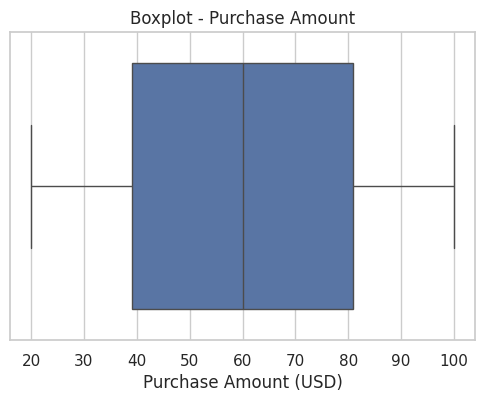

In [71]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Purchase Amount (USD)'])
plt.title("Boxplot - Purchase Amount")
plt.show()

In [72]:
Q1 = df['Purchase Amount (USD)'].quantile(0.25)
Q3 = df['Purchase Amount (USD)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers = df[
    (df['Purchase Amount (USD)'] < lower_bound) |
    (df['Purchase Amount (USD)'] > upper_bound)]

outliers.head(15)

Lower Bound: -24.0
Upper Bound: 144.0


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases


Outliers were detected using the IQR method.
The calculated lower bound was -24 and the upper bound was 144.
Since all purchase amounts fall within this range, no outliers were detected in the dataset.

In [73]:
df_no_outliers = df[
    (df['Purchase Amount (USD)'] >= lower_bound) &
    (df['Purchase Amount (USD)'] <= upper_bound)
]

print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (3900, 16)
After removing outliers: (3900, 16)


In [74]:
lower_cap = df['Purchase Amount (USD)'].quantile(0.05)
upper_cap = df['Purchase Amount (USD)'].quantile(0.95)

df_capped = df.copy()

df_capped['Purchase Amount (USD)'] = df_capped['Purchase Amount (USD)'].clip(lower_cap, upper_cap)

df_capped.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


Strategy 5

In [75]:
df[['Purchase Amount (USD)', 'Previous Purchases']].head()

,Purchase Amount (USD),Previous Purchases
0,53,14
1,64,2
2,73,23
3,90,49
4,49,31


In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = df[numeric_cols].copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled)

df_scaled.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0.000000,0.711538,0.4125,0.24,0.265306
1,0.000256,0.019231,0.5500,0.24,0.020408
2,0.000513,0.615385,0.6625,0.24,0.448980
3,0.000769,0.057692,0.8750,0.40,0.979592
4,0.001026,0.519231,0.3625,0.08,0.612245


In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df[numeric_cols].copy()
df_standardized[numeric_cols] = scaler.fit_transform(df_standardized)

df_standardized.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,-1.731607,0.718913,-0.285629,-0.907584,-0.785831
1,-1.730719,-1.648629,0.178852,-0.907584,-1.616552
2,-1.729830,0.390088,0.558882,-0.907584,-0.162789
3,-1.728942,-1.517099,1.276716,-0.349027,1.637107
4,-1.728054,0.061263,-0.454531,-1.466141,0.391025


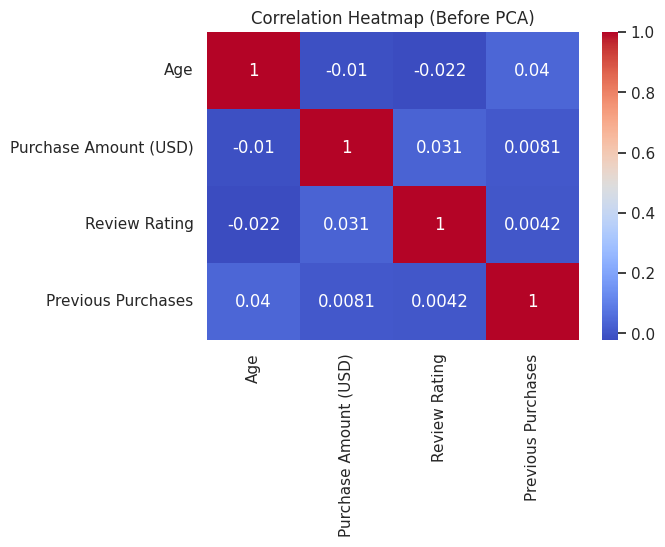

In [78]:
plt.figure(figsize=(6,4))

sns.heatmap(
    df_standardized[['Age',
                     'Purchase Amount (USD)',
                     'Review Rating',
                     'Previous Purchases']].corr(),
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation Heatmap (Before PCA)")
plt.show()

Strategy 6

In [79]:
from sklearn.decomposition import PCA

features = ['Age',
            'Purchase Amount (USD)',
            'Review Rating',
            'Previous Purchases']

X = df_standardized[features]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.26229606 0.25733577]


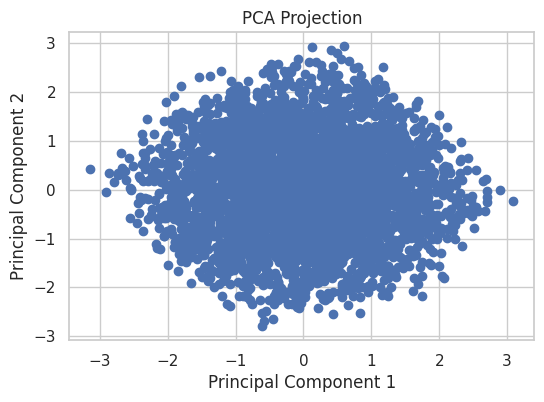

In [80]:
plt.figure(figsize=(6,4))
plt.scatter(principal_components[:,0], principal_components[:,1])
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()